In [1]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.metrics import accuracy_score, silhouette_score, calinski_harabasz_score, v_measure_score
from sklearn.manifold import TSNE

from utils import *
from models import *

2024-05-30 17:25:48.264547: I tensorflow/core/platform/cpu_feature_guard.cc:210] This TensorFlow binary is optimized to use available CPU instructions in performance-critical operations.
To enable the following instructions: AVX2 FMA, in other operations, rebuild TensorFlow with the appropriate compiler flags.
2024-05-30 17:25:50.530245: W tensorflow/compiler/tf2tensorrt/utils/py_utils.cc:38] TF-TRT Warning: Could not find TensorRT


In [2]:
original_dim = 784
latent_dim = 10
n_clusters = 10
x_train, y_train, x_test, y_test = get_data()
vae = VAE(original_dim, latent_dim)
vade = VaDE(original_dim, latent_dim, n_clusters)
reconstruction, z_mean, z_log_var, z = vae(x_test)
reconstruction, z_mean, z_log_var, z = vade(x_test)

2024-05-30 17:25:58.288540: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 17:25:59.035119: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 17:25:59.035238: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 17:25:59.066130: I external/local_xla/xla/stream_executor/cuda/cuda_executor.cc:984] could not open file to read NUMA node: /sys/bus/pci/devices/0000:01:00.0/numa_node
Your kernel may have been built without NUMA support.
2024-05-30 17:25:59.066341: I external/local_xla/xla/stream_executor

In [3]:
vae.load_weights('../models/vae.weights.h5')
vade.load_weights('../models/vade.weights.h5')

### 1)

In [4]:
preds = vade.classify(x_train).numpy()
cluster_accuracy(y_train, preds)

0.8167

In [5]:
v_measure_score(y_train, preds)

0.7648362086780163

### 2)

#### VaDE

In [6]:
x = vade.encoder(x_train)
z = vade.z_mean(x)
silhouette_score(z, y_train), calinski_harabasz_score(z, y_train)

(0.18882266, 7623.366542621829)

#### VAE

In [7]:
x = vae.encoder(x_train)
z = vae.z_mean(x)
silhouette_score(z, y_train), calinski_harabasz_score(z, y_train)

(0.08856707, 4662.499388068817)

### 3)

#### VaDE

In [8]:
reconstruction, z_mean, z_log_var, z = vade(x_test)
tsne = TSNE(n_components=2)
z_embed = tsne.fit_transform(z)

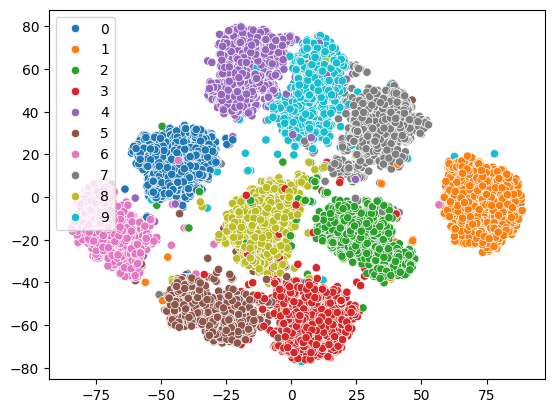

In [9]:
N=10000
sns.scatterplot(x=z_embed[:N,0], y=z_embed[:N,1], hue=y_test[:N], palette=sns.color_palette("tab10"))
plt.show()

#### VAE

In [10]:
reconstruction, z_mean, z_log_var, z = vae(x_test)
tsne = TSNE(n_components=2)
z_embed = tsne.fit_transform(z)

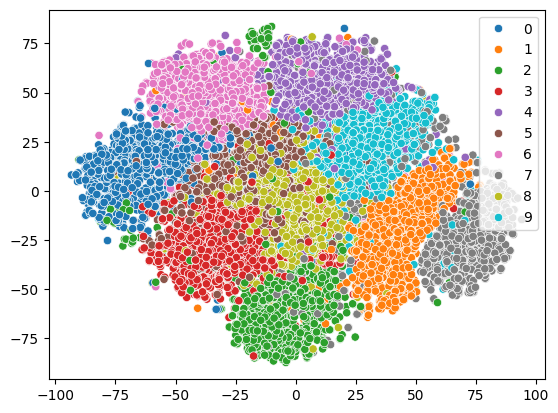

In [11]:
N=10000
sns.scatterplot(x=z_embed[:N,0], y=z_embed[:N,1], hue=y_test[:N], palette=sns.color_palette("tab10"))
plt.show()

### 4)

In [138]:
idxs = [6, 2, 1, 5, 4, 0, 8, 7, 3, 9]

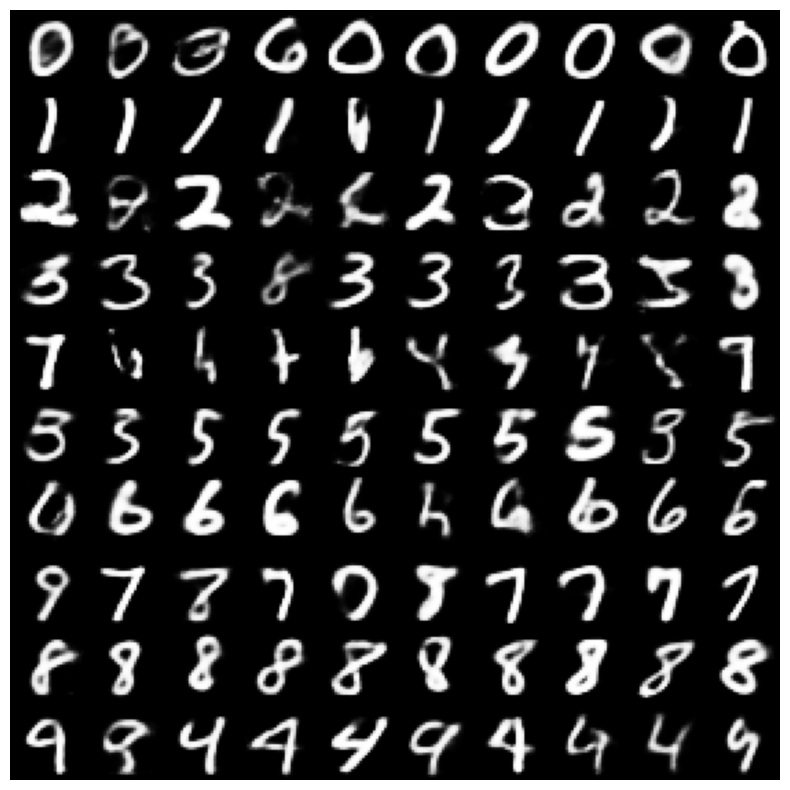

In [146]:
n = 10  # figure with 10 x 2 digits
digit_size = (np.sqrt(original_dim)).astype('int')
fig = plt.figure(figsize=(10, 10))
figure = np.zeros((digit_size * n, digit_size * n))

for i, idx in enumerate(idxs):
    mean = vade.mu_c.numpy()[idx].reshape(1, -1)
    logvar = vade.log_var_c.numpy()[idx].reshape(1, -1)
    gen_samples = [vade.sampling([mean, logvar]) for _ in range(10)]
    gen_samples = np.vstack(gen_samples)
    decoded = vade.decoder(gen_samples).numpy()
    for j in range(10):
        figure[i * digit_size: (i + 1) * digit_size, (j) * digit_size: (j+1) * digit_size] = decoded[j, :].reshape(digit_size, digit_size)


plt.imshow(figure, cmap='Greys_r')
plt.axis('off')
plt.show()

#### VAE

In [43]:
reconstruction, z_mean, z_log_var, z = vae(x_test)
idxs = [np.where(y_test == i)[0][0] for i in range(10)]

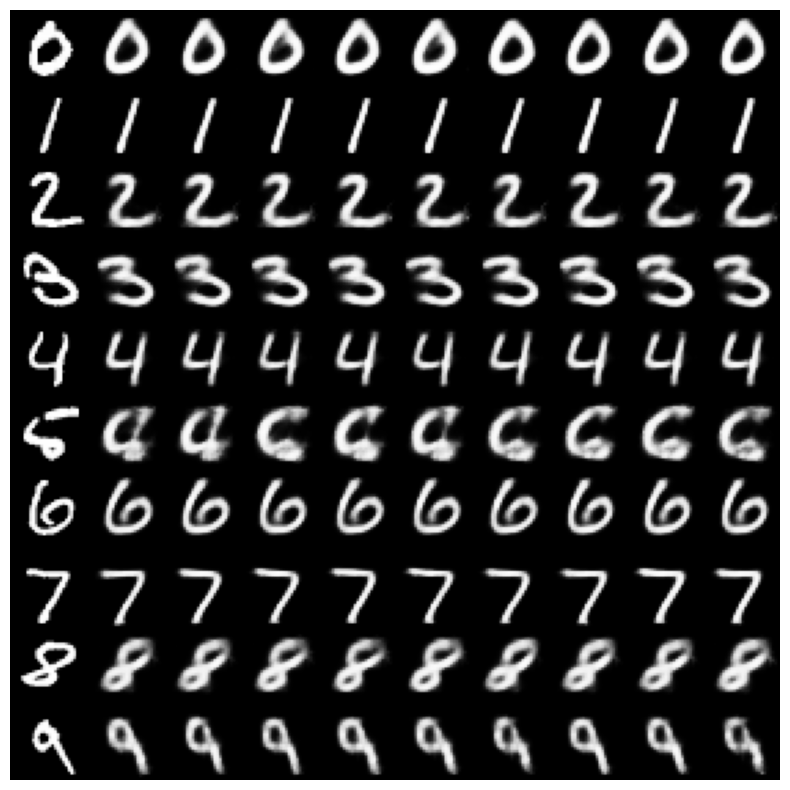

In [ ]:
n = 10  # figure with 10 x 2 digits
digit_size = (np.sqrt(original_dim)).astype('int')
fig = plt.figure(figsize=(10, 10))
figure = np.zeros((digit_size * n, digit_size * n))

for i, idx in enumerate(idxs):
    figure[i * digit_size: (i + 1) * digit_size, :digit_size] = x_test[idx, :].reshape(digit_size, digit_size)
    test = np.random.multivariate_normal(z_mean[idx], np.diag(np.exp(z_log_var[idx])), size=(9))
    decoded = vae.decoder(test).numpy()
    for j in range(9):
        figure[i * digit_size: (i + 1) * digit_size, (j+1) * digit_size: (j+2) * digit_size] = decoded[j, :].reshape(digit_size, digit_size)


plt.imshow(figure, cmap='Greys_r')
plt.axis('off')
plt.show()